In [1]:
#loading all python and machine learning libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier #using this class as extension classifier to enhance accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#reading and displaying dataset values
dataset = pd.read_csv("Dataset/Household.csv")
dataset

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,savings
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,0,0,0,2,1,0,0,1,0
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,1,0,0,0,3,1,0,0,2,0
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,1
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,1,0,0,0,0,1
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,0,0,0,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,1,0,0,0,0,1
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,3,0,0,0,0,1
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,1,0,0,0,0,1
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,2,0,0,0,0,1


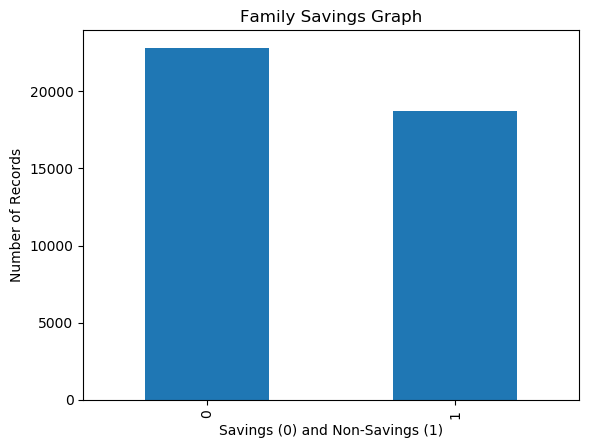

In [3]:
#plotting graph with number of families with and without savings where 0 labels refers for SAVINGS and 1 for non-savings
savings = dataset.groupby('savings').size()
savings.plot(kind="bar")
plt.xlabel('Savings (0) and Non-Savings (1)')
plt.ylabel('Number of Records')
plt.title('Family Savings Graph')
plt.show()


In [4]:
#code to replace missing values with mean and then convert all non-numeric labels into numeric labels
#and then process dataset
column = dataset.columns.ravel()
label_encoder = []
for i in range(len(column)):
    if str(dataset.dtypes[column[i]]) == 'object': #if column is string then encode to number
        le = LabelEncoder()
        dataset[column[i]] = pd.Series(le.fit_transform(dataset[column[i]].astype(str)))
        label_encoder.append(le)
dataset = dataset.apply(lambda x: x.fillna(x.mean()))#replace all missing values with mean value
#printing dataset after processing
print("Dataset values post processing")
dataset

Dataset values post processing


,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,savings
0,480332,1,117848,2,0,42140,38300,24676,16806,3325,...,1,0,0,0,2,1,0,0,1,0
1,198235,1,67766,2,0,17329,13008,17434,11073,2035,...,1,0,0,0,3,1,0,0,2,0
2,82785,1,61609,2,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,1
3,107589,1,78189,2,0,34030,28659,10914,10812,690,...,0,0,0,0,1,0,0,0,0,1
4,189322,1,94625,2,0,34820,30167,18391,11309,1395,...,0,0,0,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,16,44875,0,1,23675,21542,1476,6120,1632,...,0,0,0,0,1,0,0,0,0,1
41540,137320,16,31157,0,1,2691,1273,1886,4386,1840,...,0,0,0,0,3,0,0,0,0,1
41541,133171,16,45882,0,2,28646,27339,480,4796,1232,...,0,0,0,0,1,0,0,0,0,1
41542,129500,16,81416,0,1,29996,26655,2359,17730,2923,...,0,0,0,0,2,0,0,0,0,1


In [5]:
#code to normalize X and Y values where X represents all dataset values and Y represents traget values as 0 and 1
#0 means family has household savings and 1 means no savings
dataset = dataset.values
X = dataset[:,0:dataset.shape[1]-1]
Y = dataset[:,dataset.shape[1]-1]
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Values after normalization")
X

Values after normalization


array([[ 0.8114152 , -1.52955216,  0.63420871, ..., -0.38137735,
        -0.10315875,  1.27169261],
       [-0.17192237, -1.52955216, -0.3356711 , ..., -0.38137735,
        -0.10315875,  3.06251996],
       [-0.57435955, -1.52955216, -0.45490656, ..., -0.38137735,
        -0.10315875, -0.51913474],
       ...,
       [-0.39872334,  1.70090381, -0.75947306, ..., -0.38137735,
        -0.10315875, -0.51913474],
       [-0.41151977,  1.70090381, -0.07132744, ..., -0.38137735,
        -0.10315875, -0.51913474],
       [-0.41466397,  1.70090381, -0.1337048 , ..., -0.38137735,
        -0.10315875, -0.51913474]])

In [6]:
#now split dataset into train and test where 80% dataset used for training and 20% for testing
#split dataset into train and test features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print()
print("Total dataset size : "+str(X.shape[0]))
print("Total features/columns found in dataset : "+str(X.shape[1]))
print("80% training records : "+str(X_train.shape[0]))
print("20% testing records  : "+str(X_test.shape[0]))



Total dataset size : 41544
Total features/columns found in dataset : 60
80% training records : 33235
20% testing records  : 8309


In [7]:
#defining global features to store accuracy and other values
accuracy = []
precision = []
recall = [] 
fscore = []

In [8]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    labels = ['Savings', 'No Savings']
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(12, 6))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()

Decision Tree with Gini Index Accuracy  : 79.02274641954507
Decision Tree with Gini Index Precision : 79.5415914556832
Decision Tree with Gini Index Recall    : 79.8719284904706
Decision Tree with Gini Index FSCORE    : 79.00464113156367


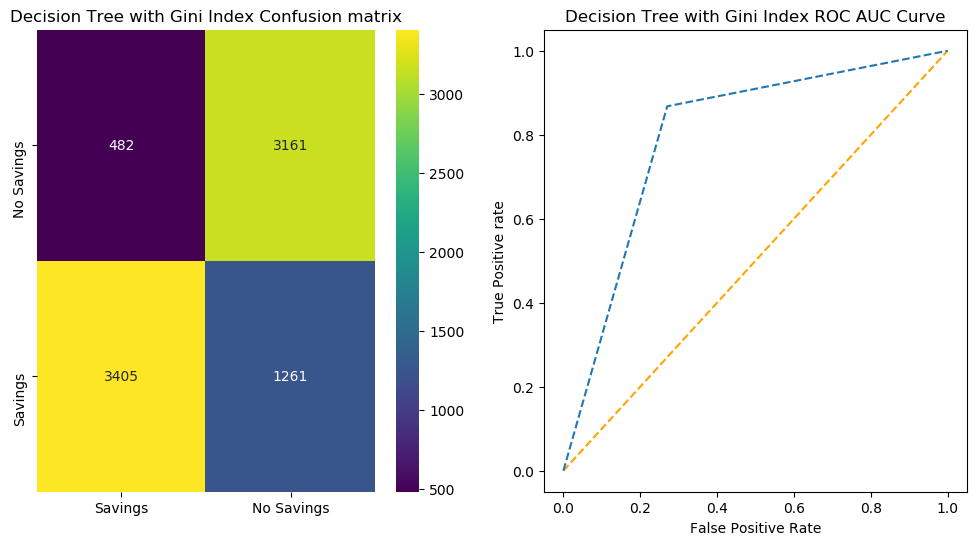

In [9]:
#now training Decision Tree with Gini index
dt = DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 3, max_features='auto')
dt.fit(X_train, y_train)
predict = dt.predict(X_test)
calculateMetrics("Decision Tree with Gini Index", y_test, predict)

Decision Tree with Information Gain Accuracy  : 84.91996630160067
Decision Tree with Information Gain Precision : 84.82553071881031
Decision Tree with Information Gain Recall    : 85.35137288935476
Decision Tree with Information Gain FSCORE    : 84.84561531105108


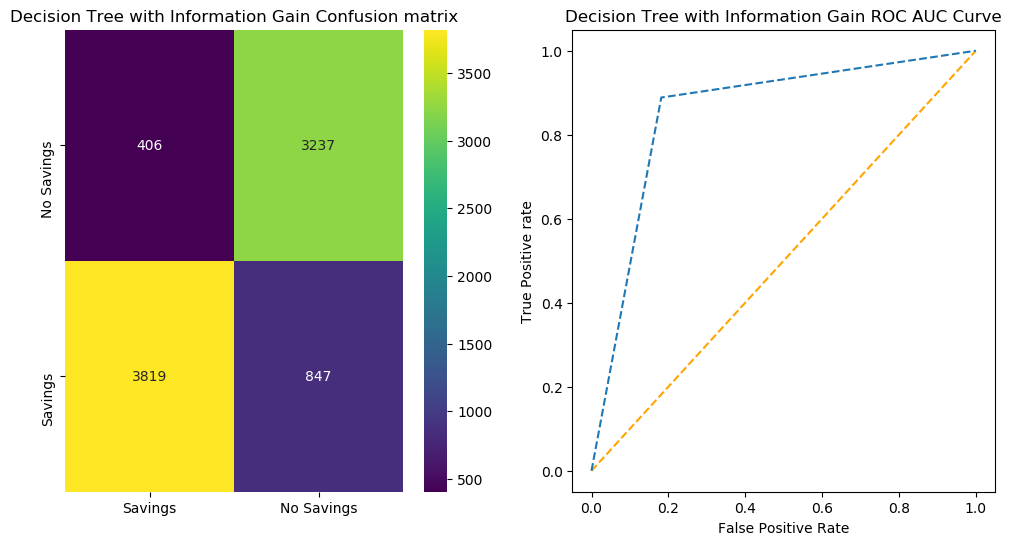

In [10]:
#now training Decision Tree with information index
dt = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5, max_features='sqrt')
dt.fit(X_train, y_train)
predict = dt.predict(X_test)
acc = accuracy_score(predict, y_test)
calculateMetrics("Decision Tree with Information Gain", y_test, predict)

Random Forest with Gini Index Accuracy  : 98.45950174509568
Random Forest with Gini Index Precision : 98.39121836576432
Random Forest with Gini Index Recall    : 98.48694611759173
Random Forest with Gini Index FSCORE    : 98.43736299127728


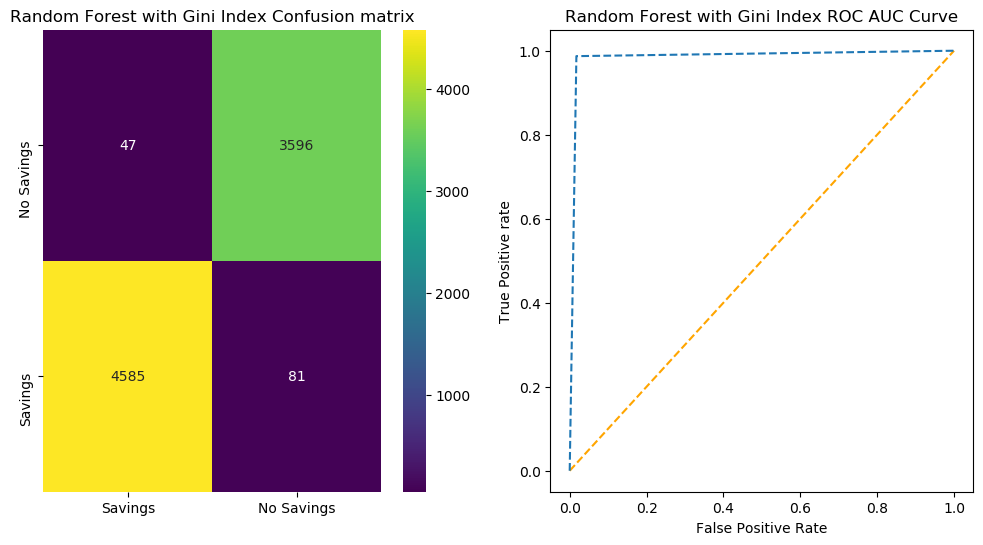

In [11]:
#now training Random Forest with Gini Index
rf = RandomForestClassifier(criterion='gini', max_leaf_nodes = 3, max_features='auto')
rf.fit(X_train, y_train)
predict = rf.predict(X_test)
calculateMetrics("Random Forest with Gini Index", y_test, predict)

Random Forest with Information Gain Accuracy  : 93.8620772656156
Random Forest with Information Gain Precision : 93.65496171533061
Random Forest with Information Gain Recall    : 94.00231659304923
Random Forest with Information Gain FSCORE    : 93.7945130807568


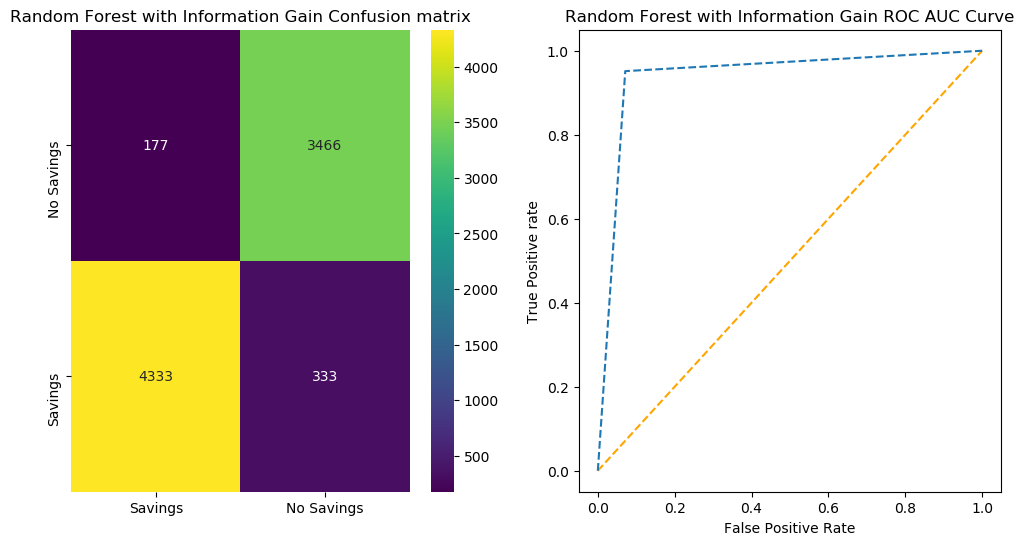

In [12]:
#now training Random Forest with Information gain
dt = RandomForestClassifier(criterion='entropy',max_leaf_nodes=2, max_features='sqrt')
dt.fit(X_train, y_train)
predict = dt.predict(X_test)
calculateMetrics("Random Forest with Information Gain", y_test, predict)

Naive Bayes Accuracy  : 85.34119629317607
Naive Bayes Precision : 86.33652948390363
Naive Bayes Recall    : 86.51782908322616
Naive Bayes FSCORE    : 85.33943781942078


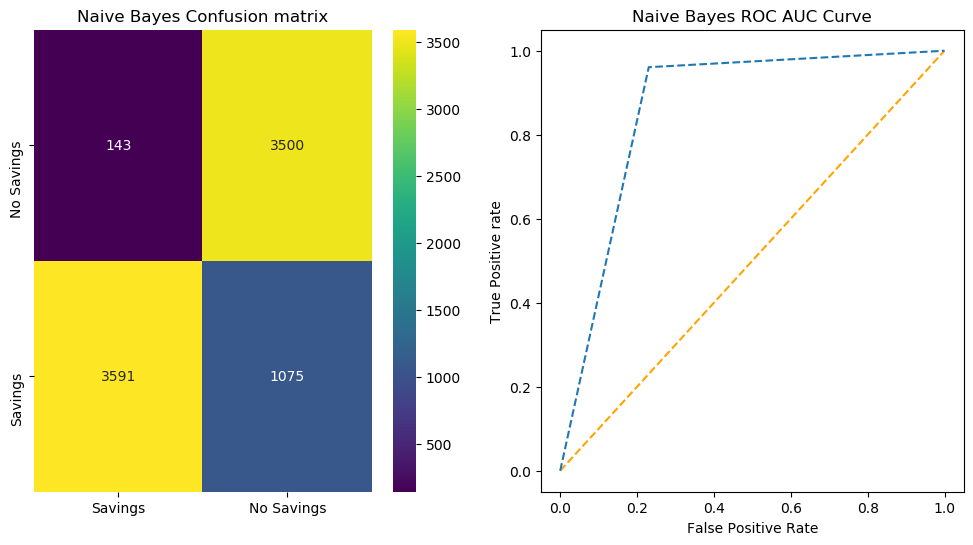

In [13]:
#now training Naive Bayes Algorithm
nb = GaussianNB()
nb.fit(X_train, y_train)
predict = nb.predict(X_test)
calculateMetrics("Naive Bayes", y_test, predict)

Neural Network MLP Classifier Accuracy  : 98.7363100252738
Neural Network MLP Classifier Precision : 98.732917977091
Neural Network MLP Classifier Recall    : 98.70030940853988
Neural Network MLP Classifier FSCORE    : 98.71643250197788


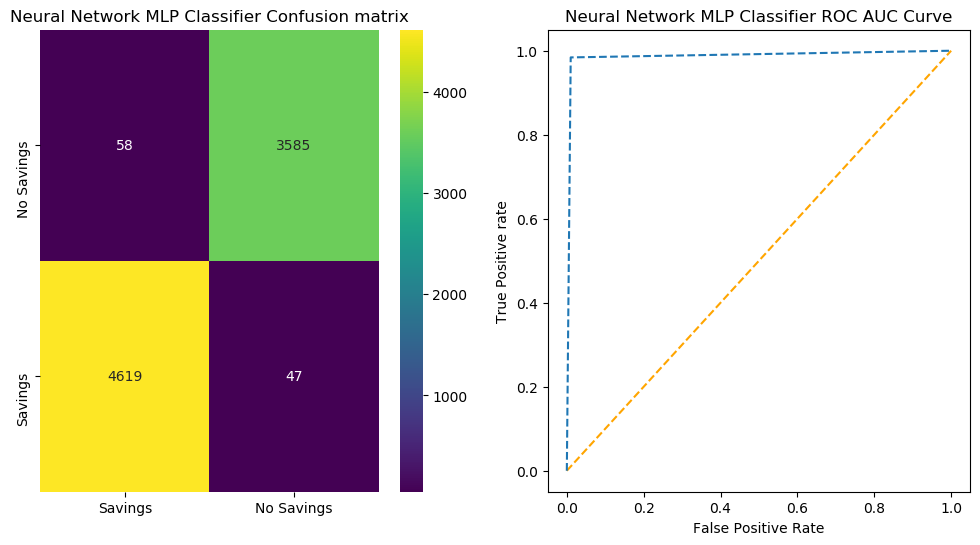

In [14]:
#now training Neural Network MLPClassifier Algorithm
nb = MLPClassifier()
nb.fit(X_train, y_train)
predict = nb.predict(X_test)
calculateMetrics("Neural Network MLP Classifier", y_test, predict)

Gradient Boosting Tree Classifier Accuracy  : 99.84354314598627
Gradient Boosting Tree Classifier Precision : 99.86108142765548
Gradient Boosting Tree Classifier Recall    : 99.82157562448532
Gradient Boosting Tree Classifier FSCORE    : 99.84107243918427


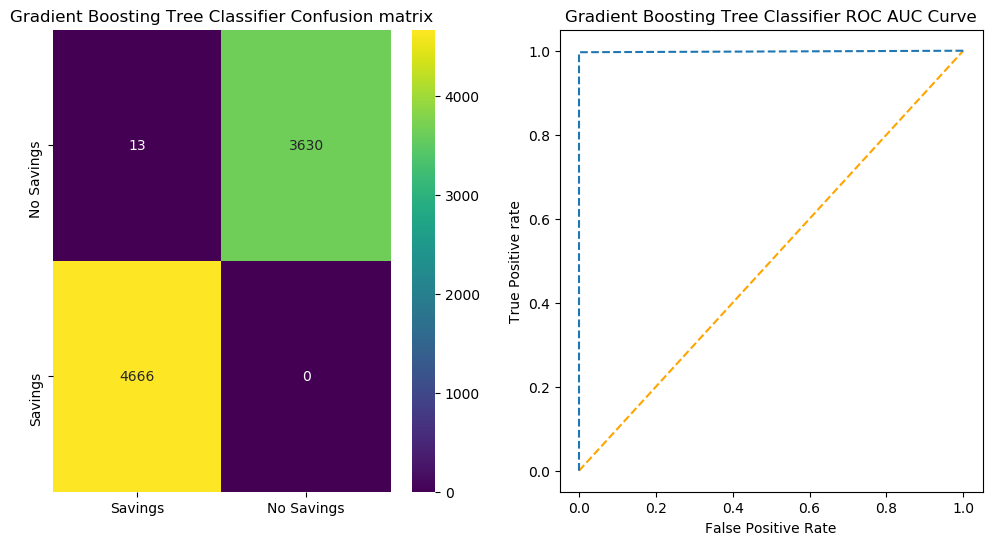

In [15]:
#now training GradientBoostingClassifier Algorithm
gb = GradientBoostingClassifier(n_estimators=20,max_features="sqrt")
gb.fit(X_train, y_train)
predict = gb.predict(X_test)
calculateMetrics("Gradient Boosting Tree Classifier", y_test, predict)

Extension AdaBoost Accuracy  : 100.0
Extension AdaBoost Precision : 100.0
Extension AdaBoost Recall    : 100.0
Extension AdaBoost FSCORE    : 100.0


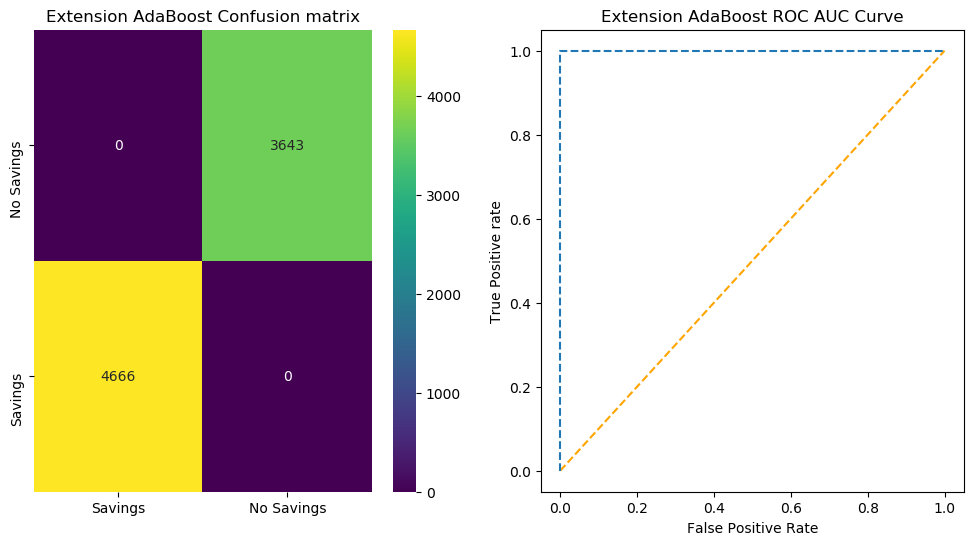

In [16]:
#extension AdaBoost Classifier which is an advance machine learning algortihm designed to boost ML performnace
extension_ada_boost = AdaBoostClassifier()
extension_ada_boost.fit(X_train, y_train)
predict = extension_ada_boost.predict(X_test)
calculateMetrics("Extension AdaBoost", y_test, predict)

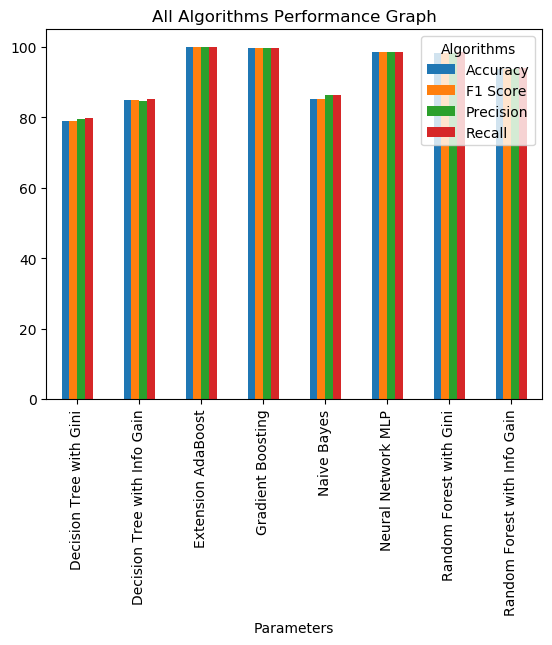

In [17]:
#now plot accuracy and other metrics comparison graph
df = pd.DataFrame([['Decision Tree with Gini','Precision',precision[0]],['Decision Tree with Gini','Recall',recall[0]],['Decision Tree with Gini','F1 Score',fscore[0]],['Decision Tree with Gini','Accuracy',accuracy[0]],
                   ['Decision Tree with Info Gain','Precision',precision[1]],['Decision Tree with Info Gain','Recall',recall[1]],['Decision Tree with Info Gain','F1 Score',fscore[1]],['Decision Tree with Info Gain','Accuracy',accuracy[1]],
                   ['Random Forest with Gini','Precision',precision[2]],['Random Forest with Gini','Recall',recall[2]],['Random Forest with Gini','F1 Score',fscore[2]],['Random Forest with Gini','Accuracy',accuracy[2]],
                   ['Random Forest with Info Gain','Precision',precision[3]],['Random Forest with Info Gain','Recall',recall[3]],['Random Forest with Info Gain','F1 Score',fscore[3]],['Random Forest with Info Gain','Accuracy',accuracy[3]],
                   ['Naive Bayes','Precision',precision[4]],['Naive Bayes','Recall',recall[4]],['Naive Bayes','F1 Score',fscore[4]],['Naive Bayes','Accuracy',accuracy[4]],
                   ['Neural Network MLP','Precision',precision[5]],['Neural Network MLP','Recall',recall[5]],['Neural Network MLP','F1 Score',fscore[5]],['Neural Network MLP','Accuracy',accuracy[5]],
                   ['Gradient Boosting','Precision',precision[6]],['Gradient Boosting','Recall',recall[6]],['Gradient Boosting','F1 Score',fscore[6]],['Gradient Boosting','Accuracy',accuracy[6]],
                   ['Extension AdaBoost','Precision',precision[7]],['Extension AdaBoost','Recall',recall[7]],['Extension AdaBoost','F1 Score',fscore[7]],['Extension AdaBoost','Accuracy',accuracy[7]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
plt.title("All Algorithms Performance Graph")
plt.show()

In [18]:
#Performance of all algorithms in tabular format
columns = ["Algorithm Name","Accuracy", "Precision", "Recall", "FSCORE"]
values = []
algorithm_names = ["Decision Tree Gini", "Decision Tree Info Gain", "Random Forest Gini", "Random Forest Info Gain", 
                   "Naive Bayes", 'MLP Classifier', 'Gradient Boosting', 'Extension AdaBoost']
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],accuracy[i],precision[i],recall[i],fscore[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,Decision Tree Gini,79.022746,79.541591,79.871928,79.004641
1,Decision Tree Info Gain,84.919966,84.825531,85.351373,84.845615
2,Random Forest Gini,98.459502,98.391218,98.486946,98.437363
3,Random Forest Info Gain,93.862077,93.654962,94.002317,93.794513
4,Naive Bayes,85.341196,86.336529,86.517829,85.339438
5,MLP Classifier,98.736310,98.732918,98.700309,98.716433
6,Gradient Boosting,99.843543,99.861081,99.821576,99.841072
7,Extension AdaBoost,100.000000,100.000000,100.000000,100.000000


In [19]:
#now predict saving from test data
labels = ['Savings', 'No Savings']
dataset = pd.read_csv("Dataset/testData.csv")#reading test data
column = dataset.columns.ravel()
index = 0
for i in range(len(column)):
    if str(dataset.dtypes[column[i]]) == 'object': #if column is string then encode to number
        dataset[column[i]] = pd.Series(label_encoder[index].fit_transform(dataset[column[i]].astype(str)))
        index = index + 1
dataset = dataset.apply(lambda x: x.fillna(x.mean()))#replace all missing values with mean value
dataset = dataset.values
X = dataset[:,0:dataset.shape[1]]#getting all features from test data and assigning to X
X = scaler.transform(X)
predict = extension_ada_boost.predict(X)#using extension prediction on test data
for i in range(len(predict)):
    print("Test Data = "+str(dataset[i])+" Predicted As ====> "+labels[predict[i]])

Test Data = [301240      0 102906      1      0  44135  38734  15810   7427   2040
   5665  16040   1534      0   3430  47028  18000      0  12120   2700
    600  27966   1500      0      0      0     45      0      3      0
      3      2      1      5      0      2      3      0      2      2
     36     11      2      0      2      1      0      1      0      0
      1      0      0      0      0      4      0      0      0      0] Predicted As ====> Savings
Test Data = [117410      0  87743      1      0  41207  35999  11649  11688   2530
   6539   4450    160   9412   3110   9816   6000      0   8700   2460
   1650   7008   1500      0      0      0     37      0      0      0
      1      3      1      5      0      3      2      0      0      0
     36     12      1      0      1      1      1      0      0      0
      0      0      0      0      0      3      0      0      0      0] Predicted As ====> No Savings
Test Data = [152913      0  59310      1      0  25390  21694   8